In [17]:
from onebox_utils import *
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
obx_folder = r"C:\Users\marty\Desktop\20251113_testing_ecog_g0"
meta_path = r"C:\Users\marty\Desktop\20251113_testing_ecog_g0\20251113_testing_ecog_g0_t0.obx0.obx.meta"
bin_path = r"C:\Users\marty\Desktop\20251113_testing_ecog_g0\20251113_testing_ecog_g0_t0.obx0.obx.bin"
chan_list = [x for x in range(12)]
# t_start = 0
# t_end = 10000

In [7]:
meta = readMeta(Path(bin_path))
sr_obx = SampRate(meta)
meta['firstSample']

'6814590'

In [8]:
raw_data = makeMemMapRaw(Path(bin_path), meta)
# subset_obx = raw_data[chan_list, first_sample:last_sample+1]a
raw_data

nChan: 14, nFileSamp: 345790871


memmap([[ 5367,  5366,  5367, ..., 11190, 11191, 11192],
        [ 5390,  5390,  5389, ..., 11255, 11256, 11255],
        [ 5382,  5381,  5382, ..., 11181, 11182, 11183],
        ...,
        [-4521, -4517, -4523, ...,   -69,   -69,   -68],
        [  511,   511,   511, ...,     7,     7,     7],
        [   64,    64,    64, ...,    64,    64,    64]], dtype=int16)

In [9]:
conv_obx = GainCorrectOBX(raw_data, chan_list, meta)

In [10]:
#secs of recording
conv_obx.shape[1]/sr_obx

11411.110154110154

In [15]:
conv_obx[:12, :]

array([[ 0.81893921,  0.81878662,  0.81893921, ...,  1.7074585 ,
         1.70761108,  1.70776367],
       [ 0.82244873,  0.82244873,  0.82229614, ...,  1.71737671,
         1.7175293 ,  1.71737671],
       [ 0.82122803,  0.82107544,  0.82122803, ...,  1.70608521,
         1.70623779,  1.70639038],
       ...,
       [-0.06484985, -0.06515503, -0.06469727, ..., -0.06439209,
        -0.06332397, -0.06469727],
       [ 0.06576538,  0.06652832,  0.06713867, ..., -0.10879517,
        -0.11001587, -0.10818481],
       [-0.68984985, -0.6892395 , -0.69015503, ..., -0.01052856,
        -0.01052856, -0.01037598]])

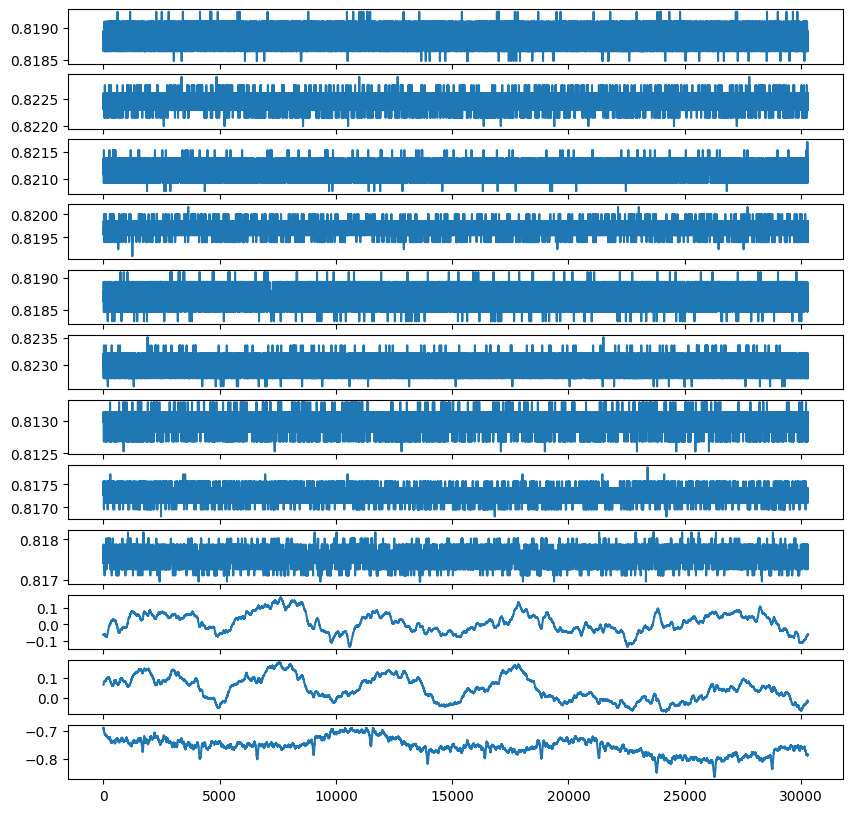

In [ ]:
fig, axs = plt.subplots(12, 1, figsize = (10,10))
for i, ax in enumerate(axs.flatten()):
    ax.plot(conv_obx[i, 0:30303])   #beautiful